In [1]:
#!/usr/bin/env python
import os
import sys

# Append the DaVinci Resolve scripting module path
sys.path.append('/Library/Application Support/Blackmagic Design/DaVinci Resolve/Developer/Scripting/Modules')
import DaVinciResolveScript as dvr_script

# Initialize DaVinci Resolve and Fusion
resolve = dvr_script.scriptapp("Resolve")
fusion = resolve.Fusion()

# Check if the connection is successful
if resolve:
    print("Connected to DaVinci Resolve successfully!")

    # Get the current project manager
    project_manager = resolve.GetProjectManager()
    
    if project_manager:
        # Get the current project
        project = project_manager.GetCurrentProject()
        
        if project:
            print(f"Current project: {project.GetName()}")

            # Get the first available timeline
            timeline_count = project.GetTimelineCount()
            
            if timeline_count > 0:
                first_timeline = project.GetTimelineByIndex(1)
                
                if first_timeline:
                    print(f"Entered first available timeline: {first_timeline.GetName()}")
                    project.SetCurrentTimeline(first_timeline)
                    
                    # Get the media pool
                    media_pool = project.GetMediaPool()
                    
                    if media_pool:
                        # Get root folder of the media pool
                        root_folder = media_pool.GetRootFolder()
                        
                        if root_folder:
                            # Get all clips in the root folder
                            clips = root_folder.GetClips()
                            
                            if clips:
                                # Add each clip to the timeline
                                for clip_id, clip in clips.items():
                                    media_pool.AppendToTimeline([clip])
                                print("All clips from the media pool have been added to the timeline.")
                            else:
                                print("No clips found in the media pool.")
                        else:
                            print("Failed to get the root folder of the media pool.")
                    else:
                        print("Failed to get the media pool.")
                else:
                    print("Failed to get the first timeline.")
            else:
                print("No timelines available in the current project.")
        else:
            print("Failed to get the current project.")
    else:
        print("Failed to get the project manager.")
else:
    print("Failed to connect to DaVinci Resolve.")

Connected to DaVinci Resolve successfully!
Current project: blender_nb
Entered first available timeline: MyTimeLine
All clips from the media pool have been added to the timeline.


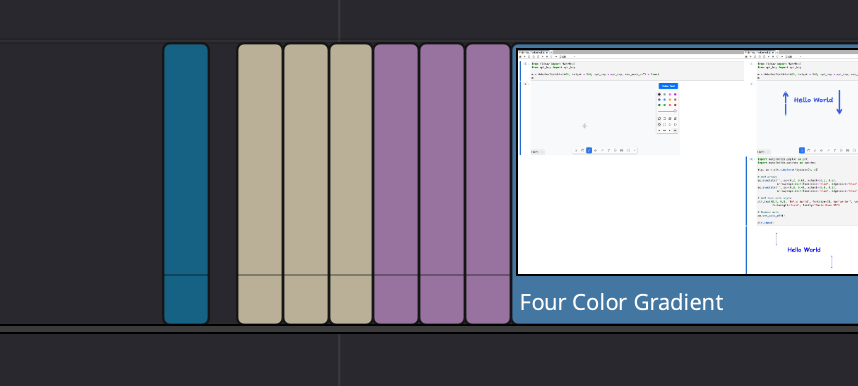